In [31]:
import numpy as np
import matplotlib.pyplot as plt

### Back-Substitution Method

In [9]:
def Back_Subst(U, b):
    n = np.shape(U)[0]
    x = 0 * np.ones((n, 1))

    if(np.isclose(np.linalg.det(U), 0) == False):
        for k in range (n-1, -1, -1):
            s = 0
            for i in range (k+1, n):
                s += U[k, i] * x[i]
            x[k] = (b[k] - s) / U[k, k]
        
    return x

### Gaussian Elimination Method
Transforms a square system of linear equations into an upper triangular system.

In [10]:
def Gauss(A, b):
    n = np.shape(A)[0]
    for i in range(1, n):
        if(np.isclose(np.linalg.det(A[:i, :i]), 0)):
            return False
            
    U = np.copy(A)

    for k in range(n - 1):
        for i in range(k + 1, n):
            factor = U[i, k] / U[k, k]
            b[i] -= factor * b[k]
            for j in range(k, n):
                U[i, j] -= factor * U[k, j]
            
    return U, b

### Forward-Substitution Method

In [11]:
def Forw_Subst(L, b):
    n = np.shape(L)[0]
    x = np.zeros((n, 1))
    
    if(np.isclose(np.linalg.det(L), 0) == False):
        
        for k in range (n):
            s = 0
            for i in range (0, k):
                s += L[k, i] * x[i]
            x[k] = (b[k] - s) / L[k, k]
        
    return x

### Using Gaussian Elimination Method to solve a system

In [20]:
A = np.array([
    [1, 2, 3],
    [2, 3, 1],
    [1, 4, 2]
])
b = [2., 4., 3.]

U, b = Gauss(A, b)

x = Back_Subst(U, b)
print(A @ x) # = b

[[2.]
 [4.]
 [3.]]


### Gaussian Elimination Method with partial pivoting

In [21]:
def Gauss_Partial_Pivot(A, b, pivot):
    n = np.shape(A)[0]

    if(np.isclose(np.linalg.det(A), 0)):
        return False
        
    Ab = np.hstack((A, b))

    for k in range(n - 1):
        if pivot:
            l = np.argmax(abs(Ab[k:, k])) + k
            Ab[[k, l], :] = Ab[[l, k], :]
        for i in range(k + 1, n):
            m = Ab[i, k] / Ab[k, k]
            for j in range(k, n + 1):
                Ab[i, j] -= m * Ab[k, j]
            
    return Ab[:, :n], Ab[:, [n]]

### LU decomposition

In [22]:
def LU(A):
    n = np.shape(A)[0]
    for i in range(1, n + 1):
        if(np.isclose(np.linalg.det(A[:i, :i]), 0)):
            return False

    L = np.eye(n)
    U = np.zeros((n, n))

    for k in range(n):
        U[k, k] = A[k, k]
        for i in range(k + 1, n):
            L[i, k] = A[i, k] / U[k, k]
            U[k, i] = A[k, i]
        for i in range(k + 1, n):
            for j in range(k + 1, n):
                A[i, j] -= L[i, k] * U[k, j]

    return L, U

### Cholesky decomposition

In [23]:
def Cholesky(A):
    n = np.shape(A)[0]
    L = np.zeros((n, n))

    for i in range(1, n):
        if (np.isclose(np.linalg.det(A[:i, :i]), 0) or np.linalg.det(A[:i, :i]) < 0):
            return False

    for k in range (n):
        L[k, k] = np.sqrt(A[k, k])
        for i in range (k + 1, n):
            L[i, k] = A[i, k] / L[k, k]
        for i in range (k + 1, n):
            for j in range (k + 1, n):
                A[i, j] -= L[i, k] * L[j, k]

    return L

### Least Squares Method

In [30]:
def LSM(A, b):
    L = Cholesky(A.T@A)
    y = Forw_Subst(L, A.T@b)
    x = Back_Subst(L.T, y)
    return x

### Regression
| X    | -5.0 | -3.4 | -2.0 | -0.8 | 0.0  | 1.2  | 2.5  | 4.0  | 5.0  | 7.0  | 8.5  |
|------|------|------|------|------|------|------|------|------|------|------|------|
| Y    | 4.4  | 4.5  | 4.0  | 3.6  | 3.9  | 3.8  | 3.5  | 2.5  | 1.2  | 0.5  | -0.2 |

In [32]:
X = np.array([[-5, -3.4, -2, -0.8, 0, 1.2, 2.5, 4, 5, 7, 8.5]]).T
Y = np.array([[4.4, 4.5, 4, 3.6, 3.9, 3.8, 3.5, 2.5, 1.2, 0.5, -0.2]]).T

##### Regression line coefficients

In [66]:
AUX = np.ones((np.shape(X)[0], 1))
A = np.hstack((X, AUX))

sol = LSM(A, Y)
a = sol[0, 0]
b = sol[1, 0]

##### Linear Regression

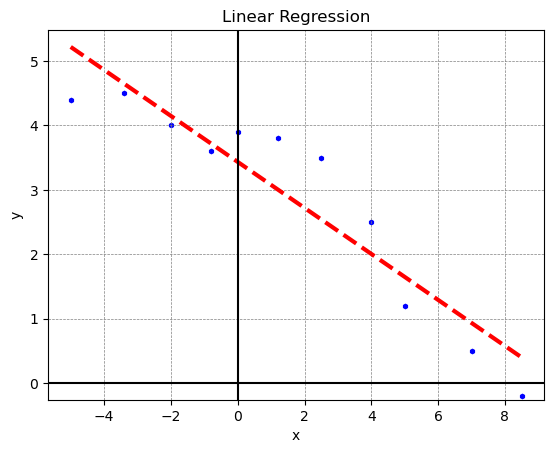

In [67]:
x = np.linspace(min(X), max(X), 100)
y = a * x + b
plt.plot(x, y, 'r--', linewidth=3);

plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title("Linear Regression")
plt.scatter(X, Y, color="blue", marker="h", s=10)

##### Quadratic Regression

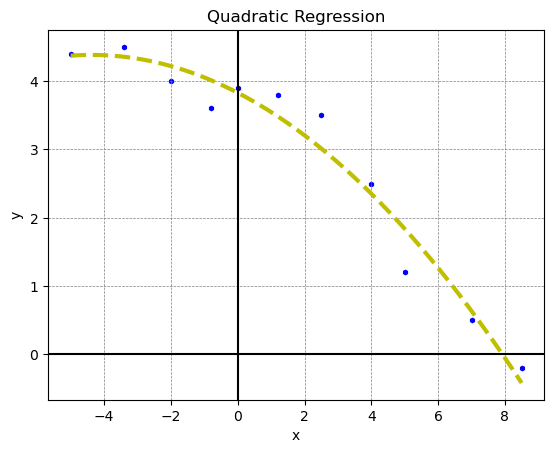

In [68]:
X2 = np.power(X, 2)
A = np.hstack((X2, X, AUX))
sol = LSM(A, Y)
a = sol[0, 0]
b = sol[1, 0]
c = sol[2, 0]

x = np.linspace(min(X), max(X), 100)
y = a * x * x + b * x + c
plt.plot(x, y, 'y--', linewidth=3)

plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Regression")
plt.scatter(X, Y, color="blue", marker="h", s=10)

##### Cubic Regression

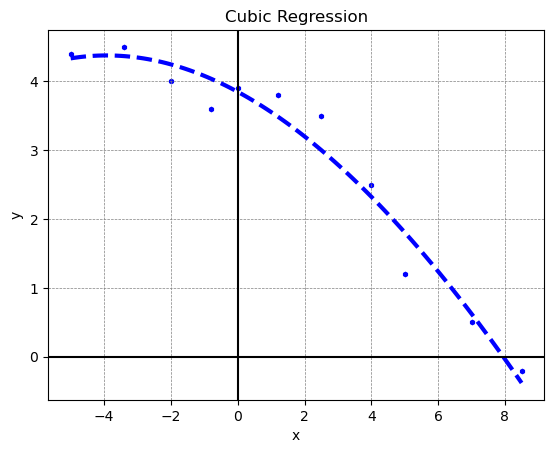

In [69]:
X3 = np.power(X, 3)
A = np.hstack((X3, X2, X, AUX))
sol = LSM(A, Y)
a = sol[0, 0]
b = sol[1, 0]
c = sol[2, 0]
d = sol[3, 0]

x = np.linspace(min(X), max(X), 100)
y = a * x * x * x + b * x * x + c * x + d
plt.plot(x, y, 'b--', linewidth=3)

plt.axvline(0, c='black')
plt.axhline(0, c='black')
plt.grid(color='grey', linestyle='--', linewidth=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cubic Regression")
plt.scatter(X, Y, color="blue", marker="h", s=10)

### Spline

##### Testing for $f(x) = \mathrm{e}^{2x}$

In [93]:
def f(x):
    return np.exp(2 * x)


def f_deriv(x):
    return 2 * np.exp(2 * x)

##### Linear Spline

In [94]:
def Linear_Spline(X, Y, x):
    n = len(X) - 1

    a = Y[:n]
    b = []
    for j in range(n):
        b.append((Y[j + 1] - Y[j]) / (X[j + 1] - X[j]))

    for j in range(n):
        if x >= X[j] and x <= X[j + 1]:
            interval = j
            break
    
    return (a[interval] + b[interval] * (x - X[interval]))

##### Linear Spline plot

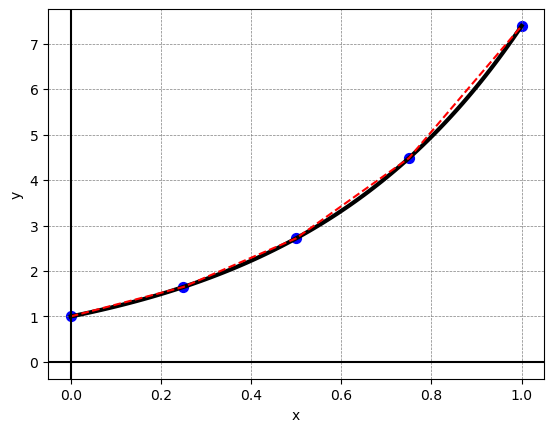

In [95]:
def Linear_Plot(f, X):
    plt.figure()

    Y = f(X)
    plt.scatter(X, Y, color="blue", marker="o", s=50);

    n = np.shape(X)[0] - 1
    x_grafic = np.linspace(a, b, n * 25 + 1)
    plt.plot(x_grafic, f(x_grafic), color="black", linewidth=3);
    

    y_grafic = []
    for x in x_grafic:
        y_grafic.append(Linear_Spline(X, Y, x))
    plt.plot(x_grafic, y_grafic, "r--")
    

    plt.axvline(0, c='black')
    plt.axhline(0, c='black')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('tight')


a, b = 0, 1
X = np.linspace(a, b, 5)
Linear_Plot(f, X)

##### Quadratic Spline

In [96]:
def Quadratic_Spline(X, Y, f_deriv, x):

    n = len(X) - 1

    a = Y[:n]
    b = []
    b.append(f_deriv(X[0]))
    for j in range(0, n - 1):
        b.append((2 * (Y[j + 1] - Y[j])) / (X[j + 1] - X[j]) - b[j])
    c = []
    for j in range(0, n):
        c.append((Y[j + 1] - Y[j] - (X[j + 1] - X[j]) * b[j]) / ((X[j + 1] - X[j]) ** 2))

    for j in range(n):
        if x >= X[j] and x <= X[j + 1]:
            interval = j
            break
    
    return a[interval] + b[interval] * (x - X[interval]) + c[interval] * ((x - X[interval]) ** 2)

##### Quadratic Spline plot

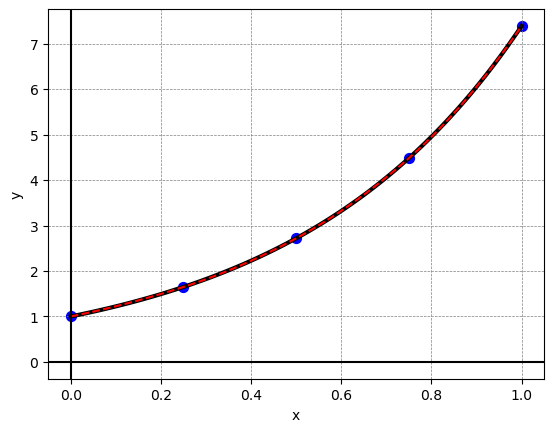

In [97]:
def Quadratic_Plot(f, X):
    plt.figure()
    
    Y = f(X)
    plt.scatter(X, Y, color="blue", marker="o", s=50);

    n = np.shape(X)[0] - 1
    x_grafic = np.linspace(a, b, n * 25 + 1)
    plt.plot(x_grafic, f(x_grafic), color="black", linewidth=3);
    
    y_grafic = []
    for x in x_grafic:
        y_grafic.append(Quadratic_Spline(X, Y, f_deriv, x))
    plt.plot(x_grafic, y_grafic, "r--")

    plt.axvline(0, c='black')
    plt.axhline(0, c='black')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis('tight')


a, b = 0, 1
X = np.linspace(a, b, 5)
Quadratic_Plot(f, X)